# Activity 3: Build an MLP with different kernels

You are now going to use the circular dataset we used in the TensorFlow playground and see what the effect of different kernels is on the outcome of the neural network.

## Dataset - circles

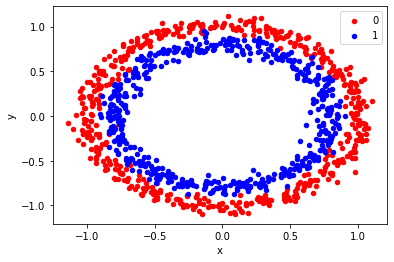

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_circles, make_checkerboard
import matplotlib.pyplot as plt

# scikit-learn offers a method to create a similar dataset
X, y = make_circles(n_samples=1000, noise=0.05)

df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}

# Plotting the dataset
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

We create a training and test set:

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## Linear kernel

Now, we create a neural network with two hidden layers, and a linear kernel. Notice that we also run the algorithm 10 times so our results converge (more on this later):

In [12]:
from tensorflow.keras.models import Sequential
from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import Adam

input_dim = X_train.shape[1]
output_dim = 1

model = Sequential()

# Add the input layer and connect to 50 hidden neurons
model.add(Dense(50,input_dim=input_dim))
model.add(Activation('linear'))

# Extra hidden layer can be added like this
model.add(Dense(50))
model.add(Activation('linear'))

# Connect the previous layer to the output layer
model.add(Dense(output_dim))

# Add a final layer for classification based on the sigmoid function
model.add(Activation('sigmoid'))

# We use a different optimiser here instead of stochastic gradient descent
# This is not important now
model.compile(optimizer=Adam(),loss='binary_crossentropy',metrics=['accuracy'])
model.summary()
model.fit(X_train,y_train,epochs=10)


# Note that the implementation of predict_proba is different from scikit-learn, so we don't need to select a label afterwards
prediction_prob = model.predict(X_test)
prediction_class = np.argmax(prediction_prob, axis=1)

print('Accuracy:', accuracy_score(y_test,prediction_class))
print('AUC:', roc_auc_score(y_test,prediction_prob))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 50)                150       
_________________________________________________________________
activation_13 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 50)                2550      
_________________________________________________________________
activation_14 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 51        
_________________________________________________________________
activation_15 (Activation)   (None, 1)                 0         
Total params: 2,751
Trainable params: 2,751
Non-trainable params: 0
____________________________________________________

Clearly, the network is having a hard time coming up with good results. The linear kernel will just not be able to capture the shapes in the data adequately. 

Let's try a different kernel.

## ReLU kernel

We can easily change the code above to use a different kernel. Now, replicate the previous network but with a rectified linear unit kernel (not in the output layer):

In [14]:
def nn_with_relu_kernel(input_dim,output_dim,X_train,y_train):
    
    model = Sequential()
    model.add(Dense(50,input_dim=input_dim))
    
    # This is the only change:
    model.add(Activation('relu'))

    model.add(Dense(50))
    
    # This is the only change:
    model.add(Activation('relu'))

    model.add(Dense(output_dim))

    model.add(Activation('sigmoid'))

    model.compile(optimizer=Adam(),loss='binary_crossentropy',metrics=['accuracy'])
    model.fit(X_train,y_train,epochs=10,verbose=0)
    ###
    ### YOUR CODE HERE
    ###
    
    return model

In [17]:
model = nn_with_relu_kernel(X_train.shape[1],1,X_train,y_train)

prediction_prob = model.predict(X_test)
prediction_class = np.argmax(prediction_prob,axis=1)

print('Accuracy:', accuracy_score(y_test,prediction_class))
print('AUC:', roc_auc_score(y_test,prediction_prob))

Accuracy: 0.54
AUC: 0.9816156736446591


That's not a bad result. You will notice that, when running the model multiple times, the result is not very stable. Nevertheless, the ReLU kernel will at least be able to break that 50% accuracy barrier that the linear kernel had because it can't predict the outcome and ends up in random guessing (or just drawing a straight line through the middle - which is the same in the case of the circles).

Your solution will be verified below.

In [6]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###
